In [1]:
#==== Pandas set up =====
import pandas as pd
pd.set_option('display.max_columns',None)

# ===== Numpy =====
import numpy as np

# ====== Visualization =====
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import optuna
from sklearn.model_selection import StratifiedKFold, cross_val_score

#=== Feature Selection =====
# Mutual information
from sklearn.metrics import mutual_info_score # univariate selection


# ====== Model Preparation=====
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from feature_engine.wrappers import SklearnTransformerWrapper
from feature_engine.encoding import OneHotEncoder

#=== Mahine learning ======
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier
# from catboost import CatBoostClassifier

#----- Metrics Evaluation ------
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score,balanced_accuracy_score,precision_score,recall_score,f1_score
from yellowbrick.classifier import ROCAUC

from IPython.display import display

c:\Users\M S I\AppData\Local\Programs\Python\Python38\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [26]:
from catboost import CatBoostClassifier

Jika error saat import yellowbricks

pip install yellowbrick <br>


Jika errors pada package feature-engine <br>
!pip install feature_engine

# Read Data Set

In [27]:
df = pd.read_csv('1709445281779-telco_churn.csv')

# Preparation

In [28]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [30]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')
df = df.dropna()

In [31]:
#replace name columns
df.columns = [x.lower().replace(" ","_") for x in df.columns]
df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [32]:
df.shape

(7032, 21)

In [33]:
df['customerid'].nunique()

7032

In [34]:
df = df.set_index('customerid')
df.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
customerid,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [35]:
#split data
df_train,df_test = train_test_split(df,stratify=df['churn'],random_state=42,test_size=0.3)

In [36]:
len(df_test)/len(df_train)

0.42868752539618044

# EDA

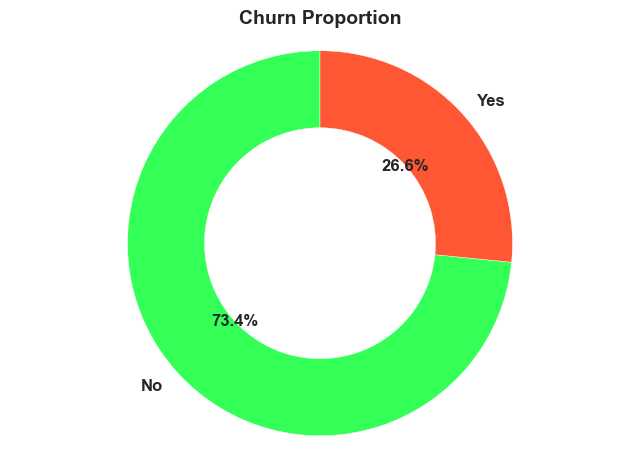

In [37]:
churn_counts = df_train['churn'].value_counts()

colors = [ '#33FF57','#FF5733']  # Red for churn, Green for not churn

fig, ax = plt.subplots()

# Plot the donut chart
wedges, texts, autotexts = ax.pie(
    churn_counts, labels=churn_counts.index, autopct='%1.1f%%', colors=colors, startangle=90,
    wedgeprops=dict(width=0.4, edgecolor='w')
)

ax.set_title("Churn Proportion", fontsize=14, fontweight='bold')

for text, autotext in zip(texts, autotexts):
    text.set(fontsize=12, fontweight='bold')
    autotext.set(fontsize=12, fontweight='bold')

centre_circle = plt.Circle((0, 0), 0.30, color='white', linewidth=0)
ax.add_artist(centre_circle)

ax.axis('equal')

plt.show()

Data imbalance tapi tidak extreme

In [38]:
df_train.churn = [1 if x=='Yes' else 0 for x in df_train.churn]

In [39]:
#setup global churn
global_mean = df_train.churn.mean()

print(f'%Churn {round(global_mean,2)*100}')

%Churn 27.0


In [40]:
#create categorical variables
cat_var = [
    var for var in df_train.columns if df_train[var].dtypes == 'O'
]
cat_var = cat_var + ['seniorcitizen']

dis_var = [
    var for var in df_train.columns if df_train[var].nunique() < 20 and var not in cat_var
]

con_var = [
    var for var in df_train.columns if var not in cat_var + dis_var + ['churn']
]

#check

print(f"Categorical Variable \n{cat_var} \ndiscreate variable \n{dis_var} \ncontinuous variable \n{con_var}")

Categorical Variable 
['gender', 'partner', 'dependents', 'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod', 'seniorcitizen'] 
discreate variable 
['churn'] 
continuous variable 
['tenure', 'monthlycharges', 'totalcharges']


# Churn Rate By Gender

In [41]:
gender_group = df_train.groupby('gender')['churn'].agg(['mean'])

#calculate risk ratio
gender_group['diff'] = gender_group['mean'] - global_mean
gender_group['risk'] = gender_group['mean'] / global_mean

gender_group

,mean,diff,risk
gender,,,
Female,0.264982,-0.000764,0.997125
Male,0.266505,0.000759,1.002856


perbedaan antara tingkat churn dalam kelompok gender dan tingkat churn global tidak terlalu besar

In [42]:
# looping for each categorical var

for categorical in cat_var[1:]:
    df_group = df_train.groupby(by=categorical).churn.agg(['mean'])
    df_group['diff'] = df_group['mean'] - global_mean
    df_group['risk'] = df_group['mean'] / global_mean
    display(df_group.style.background_gradient(low=0.7, high=1.0,cmap='YlOrRd'))

,mean,diff,risk
partner,,,
No,0.329649,0.063903,1.240467
Yes,0.197991,-0.067755,0.745039


,mean,diff,risk
dependents,,,
No,0.315744,0.049998,1.188143
Yes,0.148676,-0.117069,0.559468


,mean,diff,risk
phoneservice,,,
No,0.251572,-0.014173,0.946666
Yes,0.267267,0.001521,1.005723


,mean,diff,risk
multiplelines,,,
No,0.246069,-0.019677,0.925956
No phone service,0.251572,-0.014173,0.946666
Yes,0.291109,0.025363,1.095442


,mean,diff,risk
internetservice,,,
DSL,0.192584,-0.073162,0.724692
Fiber optic,0.419118,0.153372,1.577138
No,0.068901,-0.196844,0.259275


,mean,diff,risk
onlinesecurity,,,
No,0.421247,0.155501,1.585151
No internet service,0.068901,-0.196844,0.259275
Yes,0.146809,-0.118937,0.552440


,mean,diff,risk
onlinebackup,,,
No,0.402331,0.136585,1.513970
No internet service,0.068901,-0.196844,0.259275
Yes,0.217851,-0.047895,0.819772


,mean,diff,risk
deviceprotection,,,
No,0.392558,0.126813,1.477195
No internet service,0.068901,-0.196844,0.259275
Yes,0.229682,-0.036064,0.864293


,mean,diff,risk
techsupport,,,
No,0.420398,0.154652,1.581956
No internet service,0.068901,-0.196844,0.259275
Yes,0.153203,-0.112542,0.576504


,mean,diff,risk
streamingtv,,,
No,0.334365,0.068620,1.258216
No internet service,0.068901,-0.196844,0.259275
Yes,0.306806,0.041061,1.154511


,mean,diff,risk
streamingmovies,,,
No,0.336761,0.071015,1.267230
No internet service,0.068901,-0.196844,0.259275
Yes,0.304256,0.038511,1.144916


,mean,diff,risk
contract,,,
Month-to-month,0.428624,0.162879,1.612912
One year,0.110563,-0.155183,0.416047
Two year,0.030705,-0.235040,0.115544


,mean,diff,risk
paperlessbilling,,,
No,0.161986,-0.103760,0.609553
Yes,0.336407,0.070661,1.265899


,mean,diff,risk
paymentmethod,,,
Bank transfer (automatic),0.158672,-0.107074,0.597081
Credit card (automatic),0.152985,-0.112761,0.575682
Electronic check,0.454054,0.188308,1.708604
Mailed check,0.196185,-0.069560,0.738245


,mean,diff,risk
seniorcitizen,,,
0,0.236050,-0.029695,0.888257
1,0.418750,0.153004,1.575755


Warga senior cenderung churn lebih banyak daripada mereka yang bukan senior: risiko berpindah untuk warga senior adalah 1,57 dan untuk yang bukan senior adalah 0,89. <br>

Orang yang memiliki pasangan cenderung churn lebih kecil daripada yang tidak memiliki pasangan. Risiko masing-masing adalah 0,56 dan 1.19. <br>

Orang yang menggunakan layanan telepon tidak berisiko untuk churn: risikonya mendekati 1, dan hampir tidak ada perbedaan dengan tingkat churn global. Orang yang tidak menggunakan layanan telepon bahkan lebih tidak mungkin untuk churn: risikonya di bawah 1, dan perbedaannya dengan tingkat global adalah negatif. <br>

Orang tidak memiliki dukungan teknis cenderung churn lebih banyak daripada mereka yang memiliki dukungan teknis. <br>

Orang yang memiliki kontrak bulanan sering membatalkan kontraknya daripada yang lain, sementara orang dengan kontrak dua tahun memiliki tingkat churn yang kecil. <br>

# Feature Selection

In [43]:
def mutual_information_score(series):
    return mutual_info_score(series,df_train.churn)

df_mi = df_train[cat_var].apply(mutual_information_score)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')

df_mi.style.background_gradient(low=0.7, high=1.0,cmap='YlOrRd')

,MI
contract,0.098660
onlinesecurity,0.067598
techsupport,0.065887
internetservice,0.057195
onlinebackup,0.049191
deviceprotection,0.045738
paymentmethod,0.045664
streamingmovies,0.034245
streamingtv,0.034112
paperlessbilling,0.019630


Top 3 yang punya impact besar terhadap churn berdasarka score mutual : <br>
1.Contract <br>
2.onlinesecurity <br>
3.techsupport


Note : Mutual information tidak bekerja dengan bagus untuk variable numerik :)

In [44]:
# correlation
display(df_train[con_var].corrwith(df_train.churn))

tenure           -0.349839
monthlycharges    0.199646
totalcharges     -0.192952
dtype: float64

# Preprocessing

## Handling Multicolinearity

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["Feature"] = con_var
vif_data["VIF"] = [variance_inflation_factor(df_train[con_var].values, i) for i in range(len(con_var))]
vif_data

,Feature,VIF
0,tenure,6.300212
1,monthlycharges,3.369702
2,totalcharges,8.057185


[referensi multicolinearity](https://quantifyinghealth.com/vif-threshold/) <br>
vif tidak ada indikasi mutlico (threshold >=10)

In [46]:
#categorical selection
cat_selected = df_mi[df_mi.MI > 0.01].index.tolist()

cat_selected = cat_selected + con_var
cat_selected.remove('seniorcitizen')

print(f"Feature All \n{cat_selected}")

Feature All 
['contract', 'onlinesecurity', 'techsupport', 'internetservice', 'onlinebackup', 'deviceprotection', 'paymentmethod', 'streamingmovies', 'streamingtv', 'paperlessbilling', 'dependents', 'partner', 'tenure', 'monthlycharges', 'totalcharges']


# Modelling

In [47]:
df_test

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
customerid,,,,,,,,,,,,,,,,,,,,
7926-IJOOU,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Credit card (automatic),19.30,19.30,No
7554-AKDQF,Female,0,Yes,No,6,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Mailed check,45.65,323.45,No
0013-SMEOE,Female,1,Yes,No,71,Yes,No,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),109.70,7904.25,No
9289-LBQVU,Male,0,Yes,No,64,Yes,Yes,DSL,No,Yes,No,Yes,No,Yes,One year,Yes,Mailed check,70.15,4480.70,No
2348-KCJLT,Female,0,Yes,No,44,Yes,No,DSL,Yes,Yes,Yes,No,No,No,One year,Yes,Mailed check,61.50,2722.20,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0345-XMMUG,Female,0,Yes,No,46,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),108.90,4854.30,No
3996-ZNWYK,Male,1,Yes,Yes,71,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),19.80,1388.45,No
5222-IMUKT,Male,0,No,No,32,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Electronic check,91.05,2871.50,No


In [48]:
# X_train and y_train
X_train = df_train[cat_selected]
y_train = df_train['churn']

#X_test and y_test
X_test = df_test[cat_selected]
y_test = df_test['churn'].apply(lambda x:1 if x=='Yes' else 0)

In [49]:
# Create Pipeline Model
#define categorical columns
categorical_columns = X_train.select_dtypes(include='O').columns.tolist()
numerical_columns = X_train.select_dtypes(exclude='O').columns.tolist()

preprocessor = Pipeline([
    ('ohe', OneHotEncoder(variables=categorical_columns, drop_last=True)), # step 1
    ('scaler', StandardScaler()),# step 2 ...
])

In [50]:
X_train_processing = preprocessor.fit_transform(X_train)

X_test_processing = preprocessor.transform(X_test)

In [51]:
preprocessor.get_feature_names_out()

array(['tenure', 'monthlycharges', 'totalcharges',
       'contract_Month-to-month', 'contract_One year',
       'onlinesecurity_Yes', 'onlinesecurity_No internet service',
       'techsupport_No', 'techsupport_No internet service',
       'internetservice_Fiber optic', 'internetservice_No',
       'onlinebackup_No', 'onlinebackup_No internet service',
       'deviceprotection_No', 'deviceprotection_No internet service',
       'paymentmethod_Electronic check', 'paymentmethod_Mailed check',
       'paymentmethod_Credit card (automatic)', 'streamingmovies_No',
       'streamingmovies_No internet service', 'streamingtv_No',
       'streamingtv_No internet service', 'paperlessbilling_Yes',
       'dependents_Yes', 'partner_No'], dtype=object)

In [52]:
#----------- Return Dataframe --------------------------
X_train_processing = pd.DataFrame(X_train_processing,columns=preprocessor.get_feature_names_out())
X_test_processing = pd.DataFrame(X_test_processing,columns=preprocessor.get_feature_names_out())

In [53]:
X_train_processing

,tenure,monthlycharges,totalcharges,contract_Month-to-month,contract_One year,onlinesecurity_Yes,onlinesecurity_No internet service,techsupport_No,techsupport_No internet service,internetservice_Fiber optic,internetservice_No,onlinebackup_No,onlinebackup_No internet service,deviceprotection_No,deviceprotection_No internet service,paymentmethod_Electronic check,paymentmethod_Mailed check,paymentmethod_Credit card (automatic),streamingmovies_No,streamingmovies_No internet service,streamingtv_No,streamingtv_No internet service,paperlessbilling_Yes,dependents_Yes,partner_No
0,-0.833469,0.444749,-0.607066,0.905686,-0.509063,1.578221,-0.528305,1.020113,-0.528305,1.123365,-0.528305,1.137822,-0.528305,1.135474,-0.528305,1.398627,-0.536791,-0.527676,1.237171,-0.528305,1.240859,-0.528305,0.825234,1.530190,0.971159
1,-0.508058,-1.492135,-0.823672,-1.104136,1.964392,-0.633625,1.892846,-0.980284,1.892846,-0.890183,1.892846,-0.878872,1.892846,-0.880689,1.892846,-0.714987,1.862923,-0.527676,-0.808296,1.892846,-0.805893,1.892846,0.825234,-0.653514,0.971159
2,-1.240233,-0.120451,-0.950975,0.905686,-0.509063,1.578221,-0.528305,1.020113,-0.528305,-0.890183,-0.528305,1.137822,-0.528305,1.135474,-0.528305,-0.714987,-0.536791,1.895104,-0.808296,-0.528305,1.240859,-0.528305,0.825234,1.530190,0.971159
3,0.061411,-0.021293,-0.081500,-1.104136,1.964392,-0.633625,-0.528305,-0.980284,-0.528305,-0.890183,-0.528305,1.137822,-0.528305,-0.880689,-0.528305,-0.714987,-0.536791,-0.527676,1.237171,-0.528305,-0.805893,-0.528305,-1.211778,-0.653514,-1.029697
4,-0.833469,1.166949,-0.495086,0.905686,-0.509063,-0.633625,-0.528305,1.020113,-0.528305,1.123365,-0.528305,1.137822,-0.528305,-0.880689,-0.528305,-0.714987,-0.536791,-0.527676,-0.808296,-0.528305,-0.805893,-0.528305,0.825234,-0.653514,0.971159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4917,-0.386029,-0.353472,-0.430041,0.905686,-0.509063,-0.633625,-0.528305,-0.980284,-0.528305,-0.890183,-0.528305,-0.878872,-0.528305,1.135474,-0.528305,1.398627,-0.536791,-0.527676,1.237171,-0.528305,1.240859,-0.528305,-1.211778,1.530190,0.971159
4918,1.322379,0.201812,0.993692,-1.104136,1.964392,-0.633625,-0.528305,1.020113,-0.528305,1.123365,-0.528305,1.137822,-0.528305,1.135474,-0.528305,-0.714987,-0.536791,-0.527676,1.237171,-0.528305,1.240859,-0.528305,0.825234,-0.653514,-1.029697
4919,0.142764,0.927318,0.477390,-1.104136,-0.509063,1.578221,-0.528305,-0.980284,-0.528305,-0.890183,-0.528305,-0.878872,-0.528305,-0.880689,-0.528305,-0.714987,-0.536791,1.895104,-0.808296,-0.528305,-0.805893,-0.528305,0.825234,1.530190,-1.029697
4920,-0.914822,0.034897,-0.716478,-1.104136,1.964392,-0.633625,-0.528305,1.020113,-0.528305,-0.890183,-0.528305,-0.878872,-0.528305,-0.880689,-0.528305,-0.714987,1.862923,-0.527676,-0.808296,-0.528305,1.240859,-0.528305,0.825234,1.530190,-1.029697


In [54]:
def evaluate_classifier(classifier, X_train, y_train, X_test, y_test):

    # Function to calculate metrics
    def calculate_metrics(y_true, y_pred):
        balanced_acc = balanced_accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred)
        recall = recall_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred)
        return balanced_acc, precision, recall, f1

    # Evaluate on training set
    y_train_pred = classifier.predict(X_train)
    train_metrics = calculate_metrics(y_train, y_train_pred)

    # Evaluate on testing set
    y_test_pred = classifier.predict(X_test)
    test_metrics = calculate_metrics(y_test, y_test_pred)

    # Create a DataFrame for metrics
    metrics_df = pd.DataFrame({
        'Metric': ['Balanced Accuracy', 'Precision', 'Recall', 'F1 Score'],
        'Train': train_metrics,
        'Test': test_metrics
    })

    # Plot ROC-AUC using Yellowbrick
    visualizer = ROCAUC(classifier, classes=[0, 1], micro=False, macro=True, per_class=True)
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    visualizer.show()

    return metrics_df

In [55]:
# Model
logreg = LogisticRegression(random_state=42) # Penting untuk feature scalling
dt = DecisionTreeClassifier(max_depth=5,random_state=42)
rf = RandomForestClassifier(max_depth=5,random_state=42)
xgb = XGBClassifier(max_depth=3,random_state=42)

# LightGBM Model
lgbm_model = LGBMClassifier(random_state=42)

# AdaBoost Model
adaboost_model = AdaBoostClassifier(random_state=42)

# CatBoost Model
catboost_model = CatBoostClassifier(verbose=0, random_state=42)

# Evaluation Model (Without Imbalance)

c:\Users\M S I\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


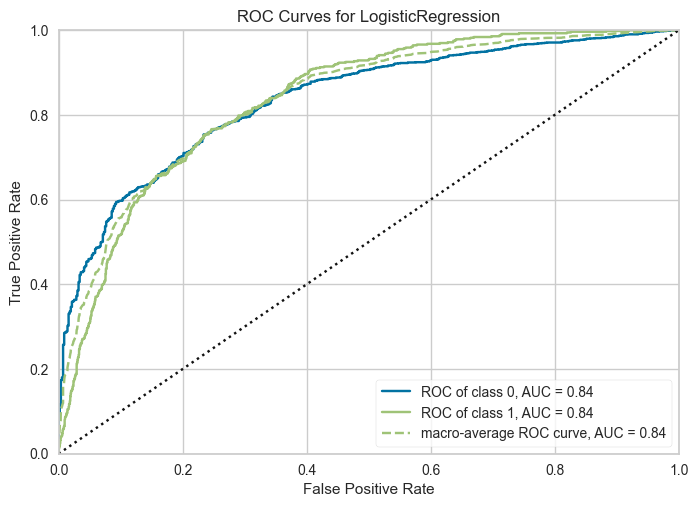

,Metric,Train,Test
0,Balanced Accuracy,0.721338,0.719559
1,Precision,0.651543,0.641079
2,Recall,0.548930,0.550802
3,F1 Score,0.595851,0.592522


In [56]:
logreg.fit(X_train_processing,y_train)
result = evaluate_classifier(logreg,X_train_processing,y_train,X_test_processing,y_test)
result

c:\Users\M S I\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


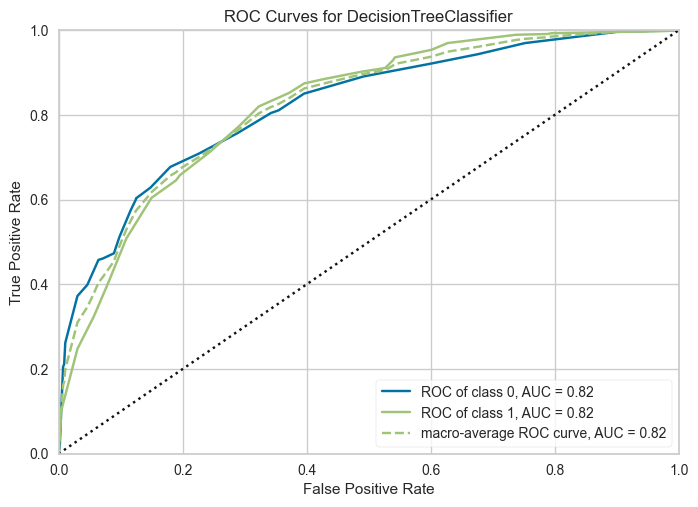

,Metric,Train,Test
0,Balanced Accuracy,0.726537,0.699459
1,Precision,0.666053,0.627753
2,Recall,0.553517,0.508021
3,F1 Score,0.604593,0.561576


In [57]:
dt.fit(X_train_processing,y_train)
result = evaluate_classifier(dt,X_train_processing,y_train,X_test_processing,y_test)
result

c:\Users\M S I\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


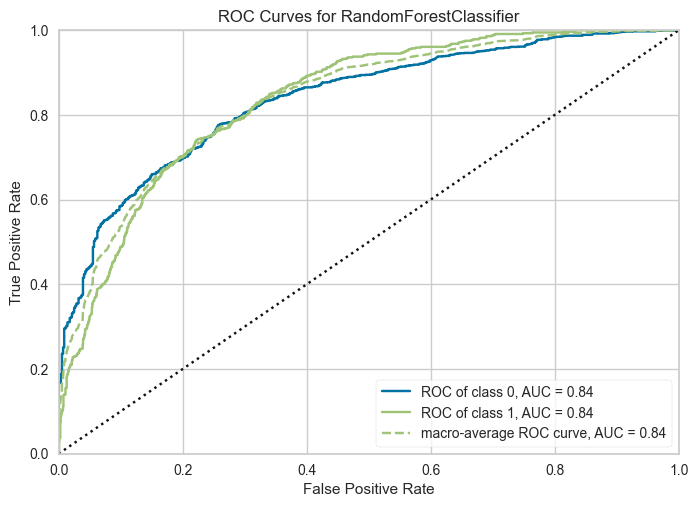

,Metric,Train,Test
0,Balanced Accuracy,0.704618,0.675829
1,Precision,0.700997,0.654155
2,Recall,0.483945,0.434938
3,F1 Score,0.572592,0.522484


In [58]:
rf.fit(X_train_processing,y_train)
result = evaluate_classifier(rf,X_train_processing,y_train,X_test_processing,y_test)
result

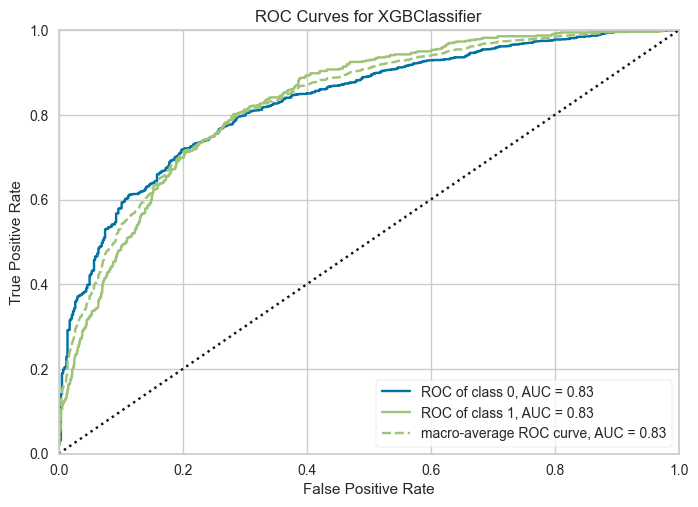

,Metric,Train,Test
0,Balanced Accuracy,0.770229,0.698505
1,Precision,0.748141,0.612288
2,Recall,0.615443,0.515152
3,F1 Score,0.675336,0.559535


In [59]:
xgb.fit(X_train_processing,y_train)
result = evaluate_classifier(xgb,X_train_processing,y_train,X_test_processing,y_test)
result

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1308, number of negative: 3614
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000797 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 649
[LightGBM] [Info] Number of data points in the train set: 4922, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265746 -> initscore=-1.016316
[LightGBM] [Info] Start training from score -1.016316


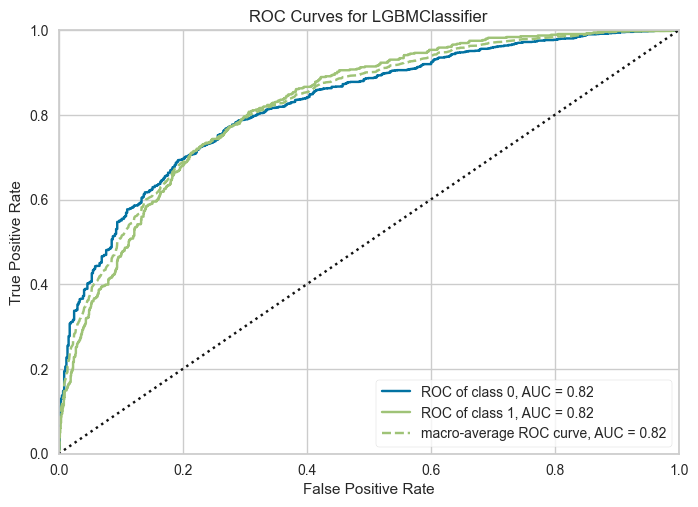

,Metric,Train,Test
0,Balanced Accuracy,0.834398,0.695417
1,Precision,0.829675,0.616558
2,Recall,0.722477,0.504456
3,F1 Score,0.772374,0.554902


In [60]:
lgbm_model .fit(X_train_processing,y_train)
result = evaluate_classifier(lgbm_model ,X_train_processing,y_train,X_test_processing,y_test)
result

c:\Users\M S I\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


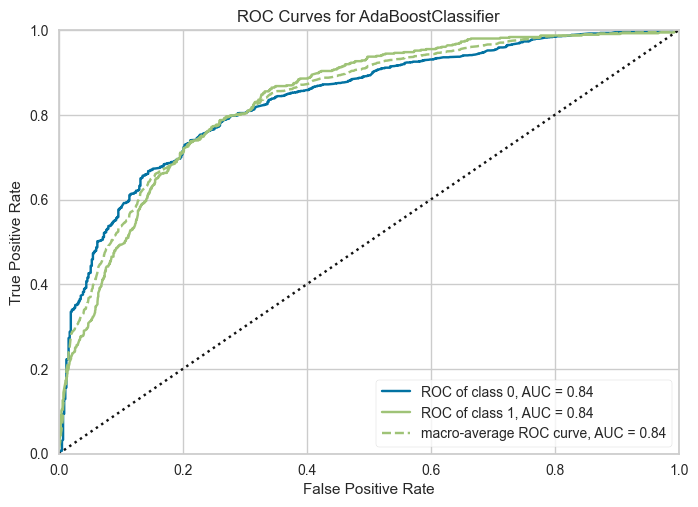

,Metric,Train,Test
0,Balanced Accuracy,0.726352,0.695726
1,Precision,0.675141,0.629797
2,Recall,0.548165,0.497326
3,F1 Score,0.605063,0.555777


In [61]:
adaboost_model  .fit(X_train_processing,y_train)
result = evaluate_classifier(adaboost_model ,X_train_processing,y_train,X_test_processing,y_test)
result

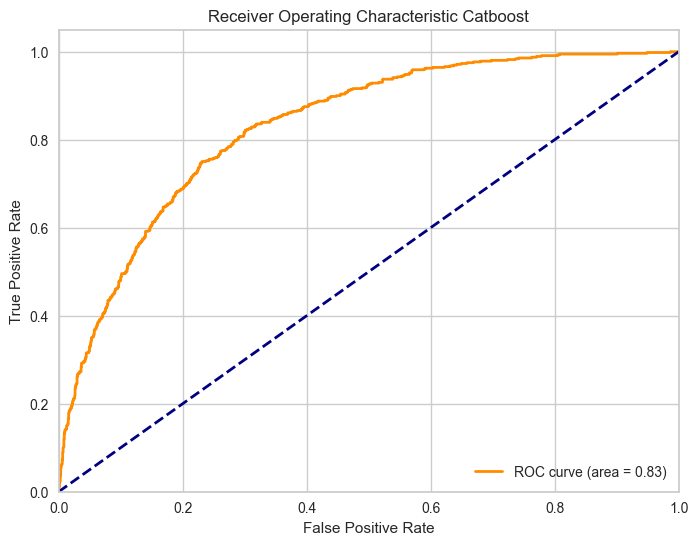

In [62]:
from sklearn.metrics import roc_curve, auc

catboost_model.fit(X_train_processing,y_train)

# Predict probabilities
y_score = catboost_model.predict_proba(X_test_processing)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Catboost')
plt.legend(loc="lower right")
plt.show()

# Handling Imbalance

## SMOTE

Perlu diperhatikan bahwa handling imbalance hanya pada data **TRAINING** saja agar tidak terjadi kebocoran data <br>

informasi tentang smote dapat dilihat [oversampling smote](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html)

In [63]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')

In [64]:
X_train_processing_re,y_train_re = smote.fit_resample(X_train_processing,y_train)

c:\Users\M S I\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


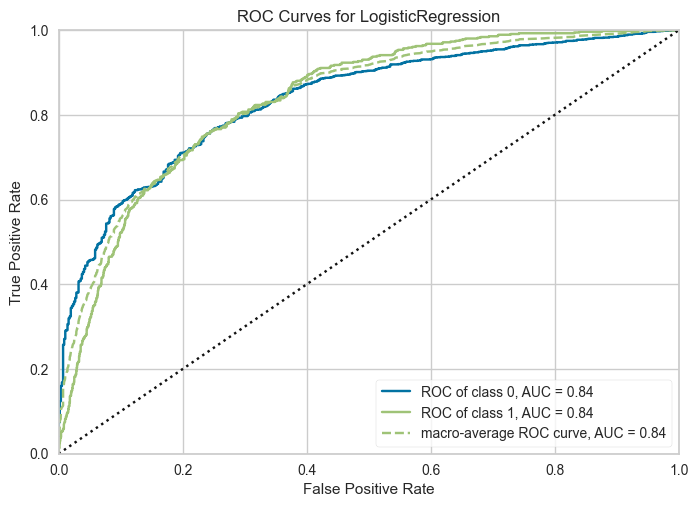

,Metric,Train,Test
0,Balanced Accuracy,0.780022,0.753695
1,Precision,0.758427,0.502262
2,Recall,0.821804,0.791444
3,F1 Score,0.788845,0.614533


In [65]:
logreg.fit(X_train_processing_re,y_train_re)
result = evaluate_classifier(logreg,X_train_processing_re,y_train_re,X_test_processing,y_test)
result

# Hyperparameter Tunning Optuna

In [66]:
import optuna
from sklearn.model_selection import cross_val_score

# Define the function to create a model based on the best parameters
def create_model_with_best_params(best_trial_params):
    model_name = best_trial_params['model_name']
    if model_name == 'lgbm':
        model = LGBMClassifier(
            num_leaves=best_trial_params['num_leaves'],
            learning_rate=best_trial_params['learning_rate'],
            n_estimators=best_trial_params['n_estimators'],
            random_state=42
        )
    elif model_name == 'adaboost':
        model = AdaBoostClassifier(
            n_estimators=best_trial_params['n_estimators'],
            learning_rate=best_trial_params['learning_rate'],
            random_state=42
        )
    elif model_name == 'catboost':
        model = CatBoostClassifier(
            iterations=best_trial_params['iterations'],
            learning_rate=best_trial_params['learning_rate'],
            depth=best_trial_params['depth'],
            verbose=0,
            random_state=42
        )
    else:
        raise ValueError("Unsupported model name: {}".format(model_name))
    return model

def objective(trial):
    model_name = trial.suggest_categorical('model_name', ['lgbm', 'adaboost', 'catboost'])
    if model_name == 'lgbm':
        param = {
            'num_leaves': trial.suggest_int('num_leaves', 2, 256),
            'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
            'n_estimators': trial.suggest_int('n_estimators', 100, 1000)
        }
        model = LGBMClassifier(**param, random_state=42)
    elif model_name == 'adaboost':
        param = {
            'n_estimators': trial.suggest_int('n_estimators', 50, 1000),
            'learning_rate': trial.suggest_float('learning_rate', 0.01, 1)
        }
        model = AdaBoostClassifier(**param, random_state=42)
    elif model_name == 'catboost':
        param = {
            'iterations': trial.suggest_int('iterations', 100, 1000),
            'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
            'depth': trial.suggest_int('depth', 4, 10)
        }
        model = CatBoostClassifier(**param, verbose=0, random_state=42)

    return cross_val_score(model, X_train_processing_re, y_train_re, n_jobs=-1, cv=5).mean()

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

c:\Users\M S I\AppData\Local\Programs\Python\Python38\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2024-03-03 14:53:44,942] A new study created in memory with name: no-name-e69546c7-813f-435b-8b59-17ad712f97f1
[I 2024-03-03 14:54:00,053] Trial 0 finished with value: 0.8337161098268938 and parameters: {'model_name': 'lgbm', 'num_leaves': 229, 'learning_rate': 0.16263915671081794, 'n_estimators': 509}. Best is trial 0 with value: 0.8337161098268938.
[I 2024-03-03 14:54:10,278] Trial 1 finished with value: 0.8290085045490004 and parameters: {'model_name': 'adaboost', 'n_estimators': 832, 'learning_rate': 0.6593175200671851}. Best is trial 0 with value: 0.8337161098268938.
[I 2024-03-03 14:54:15,211] Trial 2 finished with value: 0.838145654161103 and parameters: {'model_name': 'catboost', 'iterations': 760, 'lea

In [67]:
# After the study
best_trial_params = study.best_trial.params
best_model = create_model_with_best_params(best_trial_params)


best_model.fit(X_train_processing, y_train)

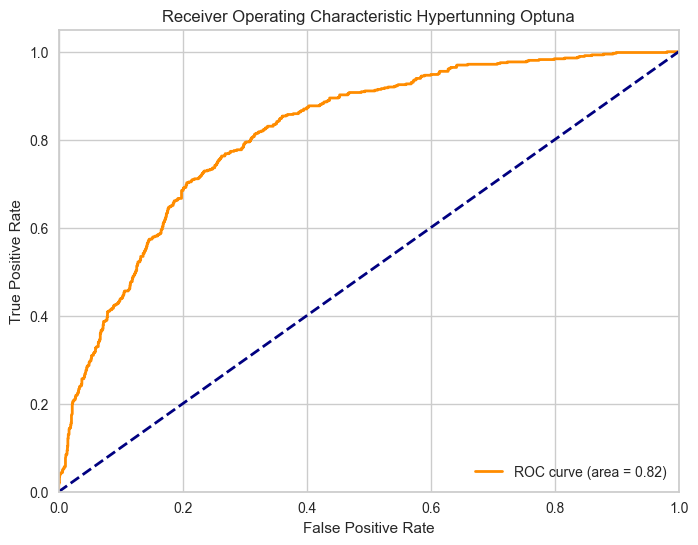

In [68]:
# Predict probabilities
y_score = best_model.predict_proba(X_test_processing)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Hypertunning Optuna')
plt.legend(loc="lower right")
plt.show()